## Analyzing the (Small) Universe of Potential Loans to SME Agrofirms

This notebook analyzes 200 hypothetical small loans to shareholder farmers and SME agrofirms in developing countries. Most of the loans are not profit-generating; they are intended to be subsidized by donor funding or grants. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import structures_and_methods
field_converters={'Loan Number':float, 'Loan Amount (USD)':float, 'Industry':str, 'Lending Region':str, \
            'Country':str, 'Loan Additionality':str, 'Climate Change Hotspot':str,'Biodiversity Hotspot':str, \
            'Soil Degradation Hotspot':str, 'Water Scarcity Hotspot':str, 'Certification':str, \
            'Planting & maintaining trees for biodiversity conservation and carbon capture':str, \
            'Clean & appropriate tech for reduced emissions and resource efficiency':str,'Poverty Level':str, \
            'Gender Inclusion':str, 'Livelihood Improvement':str,'Farmers & Employees':float, \
            'Female Farmers & Employees':float, 'Probability of Default':float, 'Expected Revenue':float, \
            'Expected Operating Expenses':float, 'Expected Cost of Debt':float, 'Expected Cost of Risk':float, \
            'Expected Net Loan Income':float,'Female Proportion':float, 'Revenues Net Operational Expense':float}
%matplotlib inline

In [2]:
data = pd.read_csv('IFA_Assignment_Data.csv', converters=field_converters)

In [3]:
from structures_and_methods import Loan
for i in data.index:
    
    data.at[i, 'Loan Object'] = Loan(data.at[i, 'Loan Number'] ,\
                                data.at[i, 'Loan Amount (USD)'] ,\
                                data.at[i, 'Industry'] ,\
                                data.at[i, 'Lending Region'] ,\
                                data.at[i, 'Country'] ,\
                                data.at[i, 'Loan Additionality'] ,\
                                data.at[i, 'Climate Change Hotspot'] ,\
                                data.at[i, 'Biodiversity Hotspot'] ,\
                                data.at[i, 'Soil Degradation Hotspot'] ,\
                                data.at[i, 'Water Scarcity Hotspot'] ,\
                                data.at[i, 'Certification'] ,\
                                data.at[i, 'Planting & maintaining trees for biodiversity conservation and carbon capture'] ,\
                                data.at[i, 'Clean & appropriate tech for reduced emissions and resource efficiency'] ,\
                                data.at[i, 'Poverty Level'] ,\
                                data.at[i, 'Gender Inclusion'] ,\
                                data.at[i, 'Livelihood Improvement'] ,\
                                data.at[i, 'Farmers & Employees'] ,\
                                data.at[i, 'Female Farmers & Employees'] ,\
                                data.at[i, 'Probability of Default'] ,\
                                data.at[i, 'Expected Revenue'] ,\
                                data.at[i, 'Expected Operating Expenses'] ,\
                                data.at[i, 'Expected Cost of Debt'] ,\
                                data.at[i, 'Expected Cost of Risk'] ,\
                                data.at[i, 'Expected Net Loan Income'])

In [4]:
for i in data.index:
    
    data.at[i, 'Expected Impact Rating'] = data.at[i, 'Loan Object'].get_impact_rating()
    if data.at[i, 'Expected Impact Rating'] <= 3:
        data.at[i, 'Impact Group'] = 'Low'
    elif data.at[i, 'Expected Impact Rating'] <= 6.5:
        data.at[i, 'Impact Group'] = 'Intermediate'
    else:
        data.at[i, 'Impact Group'] = 'High'

In [5]:
return_vs_impact = pd.DataFrame()
return_vs_impact['Expected Impact Rating'] = data['Expected Impact Rating']
return_vs_impact['Expected Net Loan Income'] = data['Expected Net Loan Income']

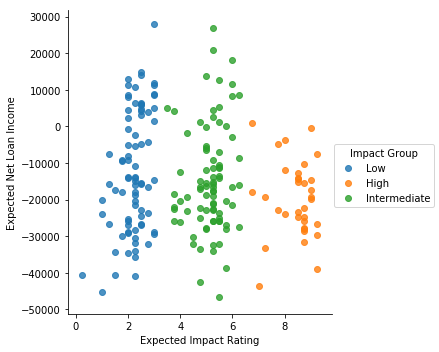

In [6]:
sns.lmplot(x='Expected Impact Rating',
           y='Expected Net Loan Income',
           data=data,
           hue='Impact Group',
           fit_reg=False)


In [7]:
loans = list(data['Loan Object'])
loans[0:5]

In [8]:
#from structures_and_methods import greedy, test_greedy, test_greedies
#test_greedies(loans)

In [23]:
from structures_and_methods import randomPortfolios, calcPortfolioMetrics
portfolios100 = randomPortfolios(loans, 100000)

In [24]:
portDF = pd.DataFrame()
portDF['portfolio'] = portfolios100
for i in portDF.index:
    portDF.at[i, 'impact'], \
    portDF.at[i, 'income'], \
    portDF.at[i,'impact-group'], \
    portDF.at[i, 'avg-income'] = calcPortfolioMetrics(portDF.at[i, 'portfolio'])

In [25]:
portDF.head()

,portfolio,impact,income,impact-group,avg-income
0,[<structures_and_methods.Loan object at 0x0000...,91.25,-212011.0,Intermediate,-10600.55
1,[<structures_and_methods.Loan object at 0x0000...,102.00,-319593.0,Intermediate,-15979.65
2,[<structures_and_methods.Loan object at 0x0000...,83.50,-331951.0,Intermediate,-16597.55
3,[<structures_and_methods.Loan object at 0x0000...,85.75,-370716.0,Intermediate,-18535.80
4,[<structures_and_methods.Loan object at 0x0000...,82.00,-225075.0,Intermediate,-11253.75


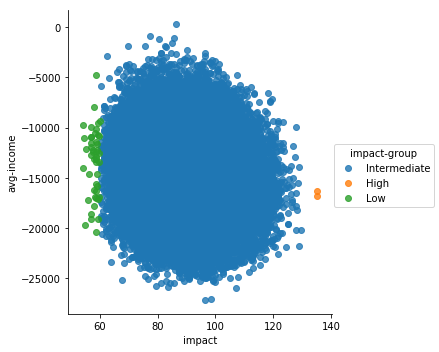

In [26]:
def plotPortfolios(portfolios):
    # intended to take a list of loan instances (the portfolio) and generate a 
    # chart of their positions on the Efficient Impact Frontier
    import seaborn as sns
    sns.lmplot(x='impact',
           y='avg-income',
           data=portfolios,
           hue='impact-group',
           fit_reg=False)
    
plotPortfolios(portDF)